##  Chitramoy Mukherjee
##  DSC 540-T302
##  Week-9 and Week-10
##  Date : 11/05/2023

## Activity - 9

### Import ncesssary libraries, including regex and beautifulsoup.
### Check the SSL certificate.
### Read the HTML from URL.
### Writae a small function to check the status of the web request.
### Decode the response and pass this to the BeautifuSoup for HTML parsing.
### Find all the href tags and store them in the list of links.Check what the list looks like - print the first 30 element.
### Use a regular expression to fincd the numeric digits in the links.These are the file numbers for the top 100 eBooks.
### Initialize the empty list to hold the file numbers over and appropriate range and use regex to find the numeric digits in the link href string.Use the find all method.
### What does the soup objectstext looks like?Use the .text method and print only the first 2000 characters(do not print the whole thing).
### Search the extracted text(Using regular expression) from the soup object to find the names of the top 100 eBooks(Yesterday's ranking).
### Create starting index. It should point at the text Top 100 Ebooks yesterda.Use the splitlines method of soup.txt. It splits the line of the text of the soup object.
### Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint : Use the splitlines method.
### Use a regular expression to extract only text from the name strings and append to an empty list. Use match and span to find the indices and use them.

In [351]:
# Load necessary libraries

import requests
from bs4 import BeautifulSoup
import re

In [360]:
# Check the SSL certificate
requests.packages.urllib3.disable_warnings()

def check_request_status(url):
    try:
        response = requests.get(url, verify=False)
        if response.status_code == 200:
            response.encoding = 'utf-8'
            return response.text
        else:
            print(f"Request failed with status code {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {str(e)}")
        return None

# Read the HTML from the URL
url = "https://www.gutenberg.org/browse/scores/top" 
html_content = check_request_status(url)

if html_content:
    soup = BeautifulSoup(html_content, 'html.parser')
    
# Find all href tags and store them in a list
    links = [a['href'] for a in soup.find_all('a') if 'href' in a.attrs]

# Print the first 30 elements of the list
    print("First 30 links:")
    print(links[:30])

# Use a regular expression to find numeric digits in the links
    numeric_digits = [re.findall(r'\d+', link) for link in links]

# Initialize the list to hold file numbers within a specific range
    file_numbers = []

# Find numeric digits in the link href strings
    for digits in numeric_digits:
        if digits:
            number = digits[0]
            if 1 <= int(number) <= 100:  # Assuming you want file numbers in the range 1-100
                file_numbers.append(number)

# Extract the text from the soup object
    soup_text = soup.get_text()

# Print the first 2000 characters of the text
    print("First 2000 characters of soup text:")
    print(soup_text[:2000])


First 30 links:
['/', '/about/', '/about/', '/policy/collection_development.html', '/about/contact_information.html', '/about/background/', '/policy/permission.html', '/policy/privacy_policy.html', '/policy/terms_of_use.html', '/ebooks/', '/ebooks/', '/ebooks/bookshelf/', '/browse/scores/top', '/ebooks/offline_catalogs.html', '/help/', '/help/', '/help/copyright.html', '/help/errata.html', '/help/file_formats.html', '/help/faq.html', '/policy/', '/help/public_domain_ebook_submission.html', '/help/submitting_your_own_work.html', '/help/mobile.html', '/attic/', '/donate/', '/donate/', '#books-last1', '#authors-last1', '#books-last7']
First 2000 characters of soup text:




Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



H

In [362]:
# Initialize a list to hold the names of the top 100 eBooks
lst_titles_temp=[]

start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

#Loop through the next 100 lines to add the strings to a temporary list
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])
    
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])
    
# Print the names of the top 100 eBooks
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
Romeo and Juliet by William Shakespeare 
The Scarlet Letter by Nathaniel Hawthorne 
Alice
A Doll
The Great Gatsby by F
The Importance of Being Earnest
The Picture of Dorian Gray by Oscar Wilde 
A Christmas Carol in Prose
Calculus Made Easy by Silvanus P
Dracula by Bram Stoker 
Metamorphosis by Franz Kafka 
A Modest Proposal by Jonathan Swift 
The Strange Case of Dr
The Yellow Wallpaper by Charlotte Perkins Gilman 
Ironheart by William MacLeod Raine 
A Tale of Two Cities by Charles Dickens 
Jane Eyre
How to know the wild flowers 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Great Expectations by Charles Dickens 
Narrative of the Life of Frederick Douglass
Moby Dick
Adventures of Huckleberry Finn by Mark Twain 
The Prince by Niccol
Amos Judd by John Ames Mitchell 
Heart of Darkness by Joseph Conrad 
The Souls of Black Folk by W
The Iliad by Homer 
Crime and Punishment by Fyodor Dostoyevsky 
Beauty in

## Activity 10

### Retrieves and prints basic data about a movie (title entered by user) from the web (OMDB database)
### If a poster of the movie could be found, it downloads the file and saves at a user-specified location

In [121]:
# Load necessary libraries

import urllib.request, urllib.parse, urllib.error
import json

In [241]:
import requests
from PIL import Image
from io import BytesIO

def get_movie_data(title):
    # Define the OMDB API endpoint and parameters
    api_url = "http://www.omdbapi.com/"
    api_key = "2218a339"  
    params = {
        "t": title,
        "apikey": api_key
    }

    try:
        # Make a GET request to the OMDB API
        response = requests.get(api_url, params=params)
        data = response.json()

        if response.status_code == 200 and data.get("Response") == "True":
            # Movie data is found
            print("Title:", data["Title"])
            print("Year:", data["Year"])
            print("Genre:", data["Genre"])
            print("Director:", data["Director"])
            print("Plot:", data["Plot"])

            # Check if a poster is available
            if data.get("Poster") != "N/A":
                poster_url = data["Poster"]
                save_poster(poster_url, title)
            else:
                print("No poster available for this movie.")
        else:
            print("Movie not found.")
    except Exception as e:
        print("An error occurred:", str(e))

def save_poster(url, title):
    response = requests.get(url)

    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(f"{title}_poster.jpg")
        print(f"Poster saved as {title}_poster.jpg")
    else:
        print("Failed to download the poster.")

if __name__ == "__main__":
    movie_title = input("Enter the title of the movie: ")
    get_movie_data(movie_title)



Enter the title of the movie: JAWS
Movie not found.


### Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

In [93]:
import requests

# Call the API
def get_random_joke():
    url = "https://v2.jokeapi.dev/joke/Any"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data['type'] == "single":
            joke = data['joke']
            print(f"Joke: {joke}")
        elif data['type'] == "twopart":
            setup = data['setup']
            delivery = data['delivery']
            print(f"Setup: {setup}")
            print(f"Delivery: {delivery}")
        else:
            print("Unknown joke format")
    else:
        print("Error:", response.status_code)
        print("Failed to retrieve a random joke.")

if __name__ == "__main__":
    get_random_joke()


Joke: To whoever stole my copy of Microsoft Office, I will find you. You have my Word!


### Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

In [91]:
import requests

def get_subset_of_data(api_url, params):
    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Error:", response.status_code)
        return None

if __name__ == "__main__":
    api_url = "https://jsonplaceholder.typicode.com/posts"

    # Specify the parameters to get 5 posts (subset of data)
    params = {
        "_start": 0,  # Starting index
        "_limit": 5   # Number of items to retrieve
    }

    subset_data = get_subset_of_data(api_url, params)

    if subset_data:
        for item in subset_data:
            print(f"Post #{item['id']}: {item['title']}")
    else:
        print("Failed to retrieve a subset of data.")


Post #1: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
Post #2: qui est esse
Post #3: ea molestias quasi exercitationem repellat qui ipsa sit aut
Post #4: eum et est occaecati
Post #5: nesciunt quas odio
Post #6: dolorem eum magni eos aperiam quia


### Take a dataset of your own, and choose 3 of the following visualizations to complete.
a. Line
b. Scatter
c. Bar
d. Histogram
e. Density Plot
f. Pie Chart

In [64]:
# Import panda and Read the csv data source.

import pandas as pd
import matplotlib.pyplot as plt

download_url = ("https://raw.githubusercontent.com/fivethirtyeight/""data/master/college-majors/recent-grads.csv")
df = pd.read_csv(download_url)

type(df)

df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


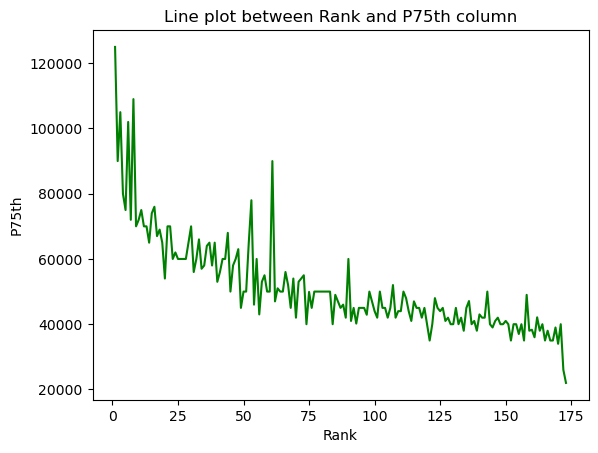

In [79]:
# Line plot between Rank and P75th column

plt.plot(df["Rank"], df["P75th"],color='green')
plt.xlabel('Rank')
plt.ylabel('P75th')
plt.title('Line plot between Rank and P75th column')
plt.show()

Text(0.5, 1.0, 'Bar plot between Major and P25th, Median and P75th')

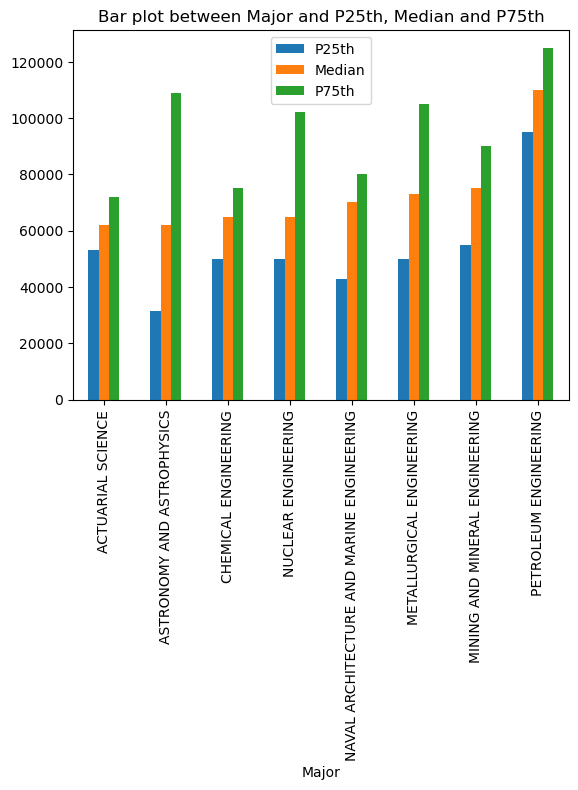

In [82]:
# Bar plot between Major and P25th, Median and P75th

top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")
plt.title('Bar plot between Major and P25th, Median and P75th')

Text(0.5, 1.0, 'Scatter plot between Median and Unemployment_rate')

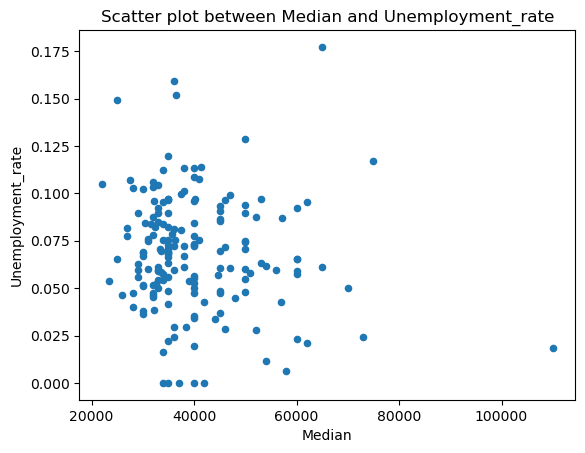

In [81]:
# Scatter plot between Median and Unemployment_rate

df.plot(x="Median", y="Unemployment_rate", kind="scatter")
plt.title('Scatter plot between Median and Unemployment_rate')